In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

# **import libraries**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D  , Flatten , Dropout,MaxPooling2D

# **preprocessing and data analysis** 

Found 5216 images belonging to 2 classes.


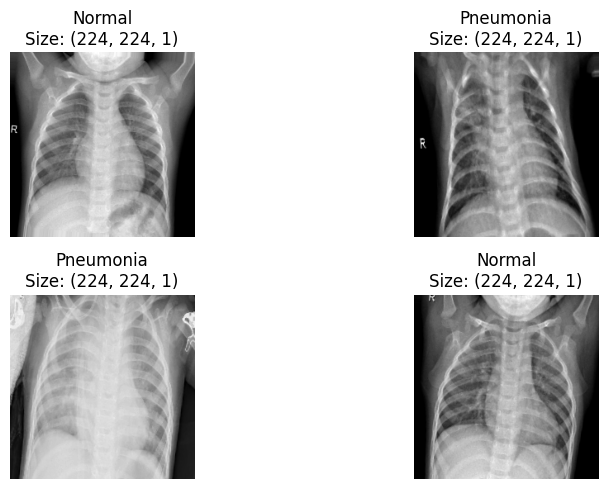

Found 5216 images in /kaggle/input/chest-xray-pneumonia/chest_xray/train


In [5]:

base_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

generator = datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),  # اختیاری: می‌تونی سایز رو تغییر بدی
    color_mode='grayscale',
    batch_size=4,
    class_mode='binary',
    shuffle=True
)

images, labels = next(generator)
class_names = ['Normal', 'Pneumonia']

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"{class_names[int(labels[i])]}\nSize: {images[i].shape}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('sample_images.png', bbox_inches='tight')
plt.show()

print(f"Found {generator.samples} images in {base_path}")

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training'  
)

val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation'  
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    target_size=(224, 224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False  
)

print(f"Train images: {train_generator.samples}, Val images: {val_generator.samples}, Test images: {test_generator.samples}")

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Train images: 4173, Val images: 1043, Test images: 624


# **CNN model**

In [7]:

model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-26 08:09:14.715907: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446,081 (24.59 MB)

 Trainable params: 6,446,081 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping],
    class_weight={0: 2.0, 1: 0.5} 
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.6871 - loss: 0.4141 - val_accuracy: 0.8677 - val_loss: 0.3370
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8829 - loss: 0.2317 - val_accuracy: 0.8763 - val_loss: 0.2543
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8841 - loss: 0.2371 - val_accuracy: 0.8677 - val_loss: 0.3215
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8839 - loss: 0.2280 - val_accuracy: 0.8907 - val_loss: 0.2954
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8952 - loss: 0.1927 - val_accuracy: 0.8917 - val_loss: 0.2585
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9047 - loss: 0.1862 - val_accuracy: 0.9252 - val_loss: 0.1987
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.9113 - loss: 0.1708 - val_accuracy: 0.8725 - val_loss: 0.3524
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9239 - loss: 0.1551 - val_accu

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 481ms/step - accuracy: 0.9006 - loss: 0.3265
Test accuracy: 0.9215


In [10]:
test_generator.reset()
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.7).astype(int)  
y_true = test_generator.classes

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 355ms/step


In [11]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

Recall: 0.9359
Precision: 0.9264
F1-Score: 0.9311
Confusion Matrix:
 [[205  29]
 [ 25 365]]


# **model performence**

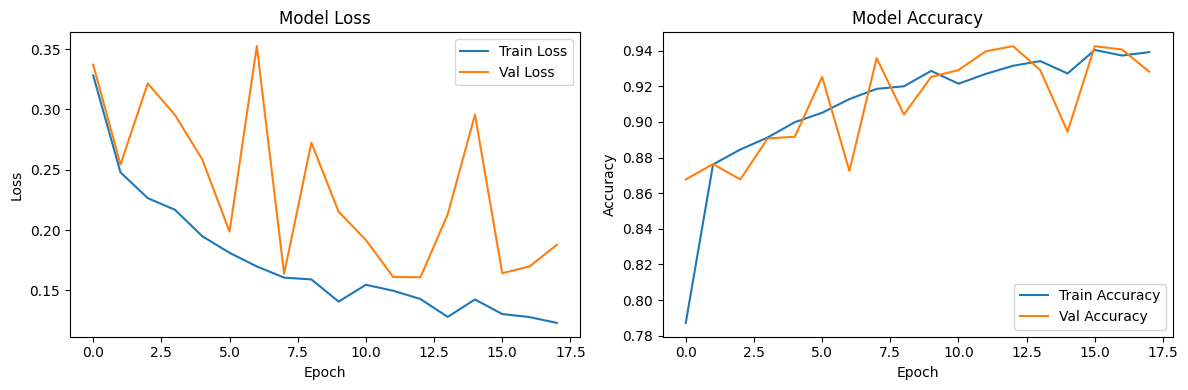

Best Validation Loss: 0.160849466919899
Best Validation Accuracy: 0.9424736499786377


In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('model_performance.png', bbox_inches='tight')
plt.show()

# چاپ نتایج نهایی
print(f"Best Validation Loss: {min(history.history['val_loss'])}")
print(f"Best Validation Accuracy: {max(history.history['val_accuracy'])}")
